In [1]:
import numpy as np
from scipy import stats
import scipy
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import mean, median, variance
warnings.simplefilter('ignore', DeprecationWarning)


In [71]:
# Replace this with your actual data
data = [180.5, 181.7, 180.9, 181.6, 182.6, 181.6, 181.3, 182.1, 182.1, 180.3, 181.7, 180.5]


# Example: frequency table
values = [150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950]
frequencies = [5, 15, 27, 34, 22, 14, 7, 2, 4, 1]

bin_edges = [3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]

cumulative_frequ = [19.3, 37.6, 62.7, 77.5, 87.2, 93.8, 95.7, 98.6, 99.1, 99.5, 99.6, 99.8, 100]
# Convert to frequencies
non_cumu_frequ = [cumulative_frequ[0]]
for i in range(1, len(cumulative_frequ)):
    non_cumu_frequ.append(cumulative_frequ[i] - cumulative_frequ[i - 1])

# Scale frequencies to preserve decimal precision
#scaling_factor = 10  # Try 10, 100, or 1000 depending on desired granularity
#scaled_frequencies = [round(f * scaling_factor) for f in non_cumu_frequ]
#frequencies = scaled_frequencies
frequencies = non_cumu_frequ
relative_frequencies = non_cumu_frequ

#total = sum(frequencies)
#relative_frequencies = [f / total for f in frequencies]

#raw_data = np.repeat(values, frequencies)
#data = raw_data # REMOVE IF NOT NECESSARY
#print("raw_data: ", raw_data)
print("frequencies: ", frequencies)
#print("scaled_frequencies: ", scaled_frequencies)
print("relative_frequencies: ", relative_frequencies)

frequencies:  [19.3, 18.3, 25.1, 14.799999999999997, 9.700000000000003, 6.599999999999994, 1.9000000000000057, 2.8999999999999915, 0.5, 0.4000000000000057, 0.09999999999999432, 0.20000000000000284, 0.20000000000000284]
relative_frequencies:  [19.3, 18.3, 25.1, 14.799999999999997, 9.700000000000003, 6.599999999999994, 1.9000000000000057, 2.8999999999999915, 0.5, 0.4000000000000057, 0.09999999999999432, 0.20000000000000284, 0.20000000000000284]


In [3]:
# Define the diameter intervals and corresponding frequencies
diameter_intervals = ["3.0–<3.5", "3.5–<4.0", "4.0–<4.5", "4.5–<5.0","5.0–<5.5", "5.5–<6.0", "6.0–<6.5", "6.5–<7.0", "7.0–<7.5", "7.5–<8.0"]
frequencies = [5, 15, 27, 34, 22, 14, 7, 2, 4, 1]
total_observations = sum(frequencies) # Find total number of observations
less_than_5nm = sum(frequencies[:4])

# Calculate the fraction as a decimal
fraction_less_than_5nm = less_than_5nm / total_observations

# Display results
print(f"Total observations: {total_observations}")
print(f"Observations < 5nm: {less_than_5nm}")
print(f"Fraction < 5nm: {fraction_less_than_5nm:.4f}")


Total observations: 131
Observations < 5nm: 81
Fraction < 5nm: 0.6183


In [4]:
at_least_6nm = sum(frequencies[6:])
print("Fraction > 6nm: ", at_least_6nm/total_observations)

Fraction > 6nm:  0.10687022900763359


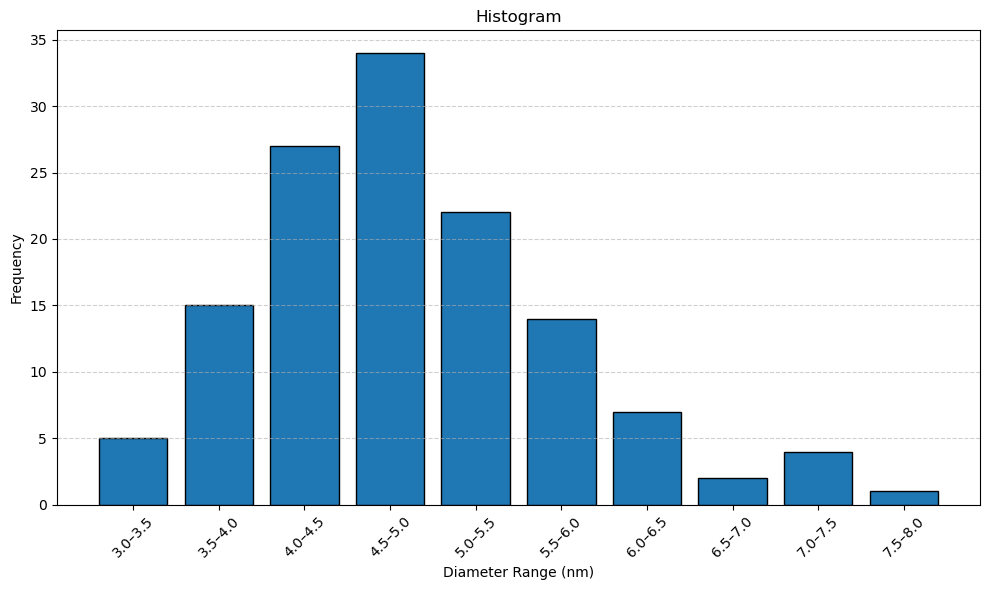

In [5]:
# Diameter bins (use midpoints for x-axis labels)
diameter_bins = ["3.0–3.5", "3.5–4.0", "4.0–4.5", "4.5–5.0",
                 "5.0–5.5", "5.5–6.0", "6.0–6.5", "6.5–7.0",
                 "7.0–7.5", "7.5–8.0"]

frequencies = [5, 15, 27, 34, 22, 14, 7, 2, 4, 1]

# Plotting the histogram-like bar chart
plt.figure(figsize=(10, 6))
plt.bar(diameter_bins, frequencies, edgecolor='black')

# Add labels and title
plt.xlabel("Diameter Range (nm)")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()
del frequencies, diameter_bins, at_least_6nm, fraction_less_than_5nm, total_observations, diameter_intervals, less_than_5nm

In [73]:
import numpy as np
from scipy import stats
data1 = [6.0, 5.0, 11.0, 33.0, 4.0, 5.0, 80.0, 18.0, 35.0, 17.0, 23.0]
data2 = [4.0, 14.0, 11.0, 9.0, 9.0, 8.0, 4.0, 20.0, 5.0, 8.9, 21.0, 9.2, 3.0, 2.0, 0.3]
data3 = [34.0, 49.0, 13.0, 33.0, 24.0, 24.0, 35.0, 104.0, 34.0, 40.0, 38.0, 1.0]
data4 = [2.0, 64.0, 6.0, 17.0, 35.0, 11.0, 17.0, 13.0, 5.0, 27.0, 23.0, 28.0, 10.0, 13.0, 0.2]
# Example datasets
data_sets = {
    "Data" : data,
    "Data1": data1,
    "Data2": data2,
    "Data3": data3,
    "Data4": data4
 
}

for name, dataset in data_sets.items():
    print(f"\n--- Statistics for {name} ---")
    
    # Mean
    mean_val = np.mean(dataset)
    print(f"Mean: {mean_val}")
    
    # Mode
    mode_result = stats.mode(dataset, keepdims=True)
    print(f"Mode: {mode_result.mode[0]} (Count: {mode_result.count[0]})")
    
    # Median
    median_val = np.median(dataset)
    print(f"Median: {median_val}")
    
    # Population Variance
    pop_var = np.var(dataset)
    print(f"Population Variance: {pop_var}")
    
    # Sample Variance
    sample_var = np.var(dataset, ddof=1)
    print(f"Sample Variance: {sample_var}")
    
    # Population Standard Deviation
    std_dev_pop = np.sqrt(pop_var)
    print(f"Population Standard Deviation: {std_dev_pop}")

    # Sample Standard Deviation
    std_dev_sample = np.sqrt(sample_var)
    print(f"Sample Standard Deviation: {std_dev_sample}")
    
    # Quartiles and IQR
    Q1 = np.percentile(dataset, 25)
    Q3 = np.percentile(dataset, 75)
    IQR = Q3 - Q1
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")



--- Statistics for Data ---
Mean: 181.4083333333333
Mode: 180.5 (Count: 2)
Median: 181.6
Population Variance: 0.4807638888888823
Sample Variance: 0.5244696969696897
Population Standard Deviation: 0.6933713931861353
Sample Standard Deviation: 0.7242028009954737
Q1: 180.8
Q3: 181.79999999999998
IQR: 0.9999999999999716

--- Statistics for Data1 ---
Mean: 21.545454545454547
Mode: 5.0 (Count: 2)
Median: 17.0
Population Variance: 452.0661157024793
Sample Variance: 497.2727272727272
Population Standard Deviation: 21.261846479139088
Sample Standard Deviation: 22.29961271575646
Q1: 5.5
Q3: 28.0
IQR: 22.5

--- Statistics for Data2 ---
Mean: 8.560000000000002
Mode: 4.0 (Count: 2)
Median: 8.9
Population Variance: 34.58906666666667
Sample Variance: 37.059714285714286
Population Standard Deviation: 5.881247033297162
Sample Standard Deviation: 6.087669035494151
Q1: 4.0
Q3: 10.1
IQR: 6.1

--- Statistics for Data3 ---
Mean: 35.75
Mode: 24.0 (Count: 2)
Median: 34.0
Population Variance: 572.6875
Sample 

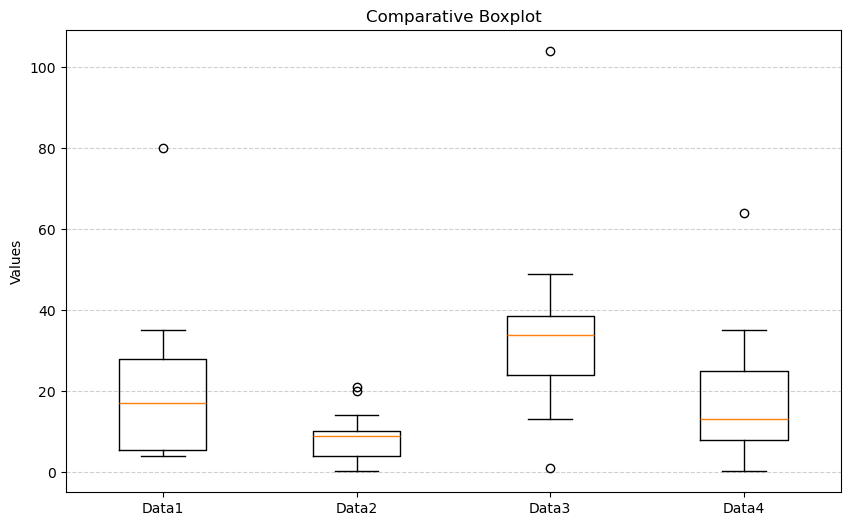

In [67]:
data_sets = [data1, data2, data3, data4]
labels = ['Data1', 'Data2', 'Data3', 'Data4']

plt.figure(figsize=(10, 6))
plt.boxplot(data_sets, labels=labels)
plt.title("Comparative Boxplot")
plt.ylabel("Values")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [8]:
from scipy import stats

# Get the mode and its count
mode_result = stats.mode(data, keepdims=True)

# Print the mode value
print(f"Mode: {mode_result.mode[0]}")

# Optional: Print how many times it occurs
print(f"Count: {mode_result.count[0]}")

del mode_result

Mode: 1
Count: 1


In [14]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = [x for x in data if x < lower_bound]
upper_outliers = [x for x in data if x > upper_bound]

print(f"Lower Outliers: {lower_outliers}")
print(f"Upper Outliers: {upper_outliers}")

del Q1, Q3, IQR, lower_bound, upper_bound, lower_outliers, upper_outliers



dataSet = np.array([58.8, 30.8, 27.3, 29.9, 17.7, 76.5, 44.5, 47.1, 48.7, 41.6, 32.8, 18.3, 73.3, 57.1, 66, 93.8, 133.2, 81.1, 30.6, 24.2, 16.6, 38.9, 28.7, 23.6])
dataSet = dataSet.reshape(len(dataSet),1)
df = pd.DataFrame(data=dataSet, columns=["data:"])
Q1 = df.quantile(0.25).values[0]
Q3 = df.quantile(0.75).values[0]
IQR = Q3 - Q1
mask = ((df < (Q1 - 1.5*IQR)) | (df > Q3 + (1.5 * IQR)))
outliars = (df*mask).to_numpy()
print("Outliers:")
for e in outliars:
    if(e != 0):
        print(e)

del dataSet, df, Q1, Q3, IQR, mask, outliars

Lower Outliers: []
Upper Outliers: []
Outliers:
[133.2]


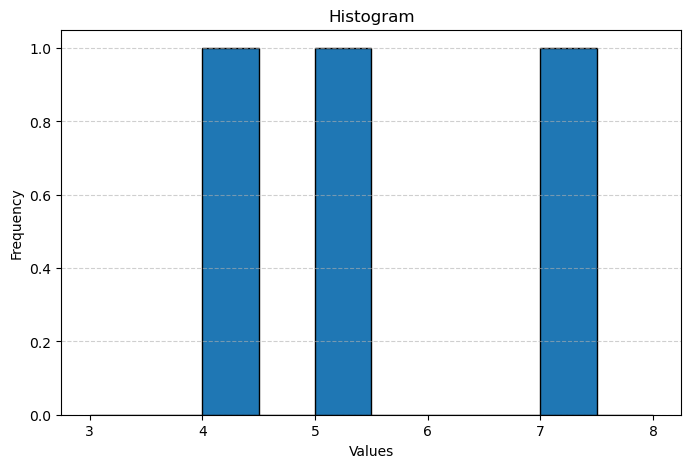

In [15]:
plt.figure(figsize=(8,5))
plt.hist(data, bins=bin_edges, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


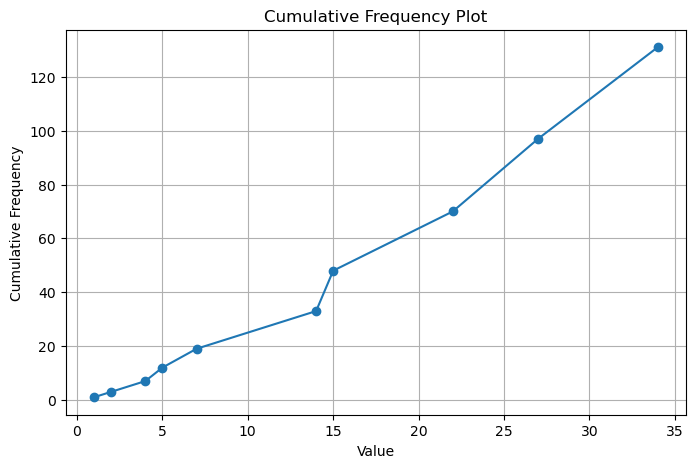

In [16]:
sorted_data = np.sort(data)
cum_freq = np.cumsum(sorted_data)

plt.figure(figsize=(8,5))
plt.plot(sorted_data, cum_freq, marker='o')
plt.title('Cumulative Frequency Plot')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

del sorted_data, cum_freq


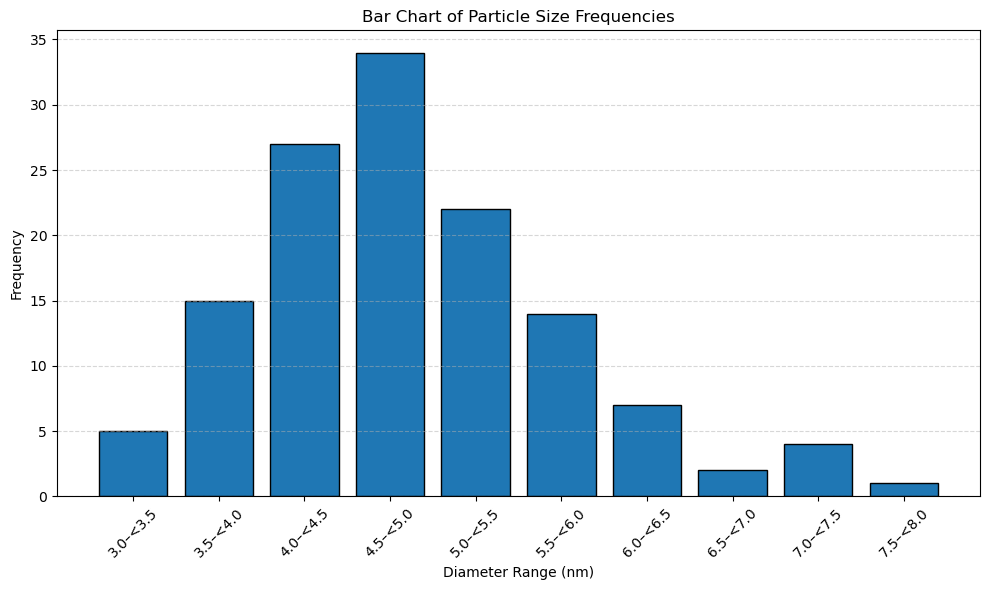

In [17]:
# For grouped data: e.g., labels and frequencies
labels = ['3.0–<3.5', '3.5–<4.0', '4.0–<4.5', '4.5–<5.0', 
          '5.0–<5.5', '5.5–<6.0', '6.0–<6.5', '6.5–<7.0', 
          '7.0–<7.5', '7.5–<8.0']

plt.figure(figsize=(10,6))
plt.bar(labels, data, edgecolor='black')
plt.title('Bar Chart of Particle Size Frequencies')
plt.xlabel('Diameter Range (nm)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

del labels


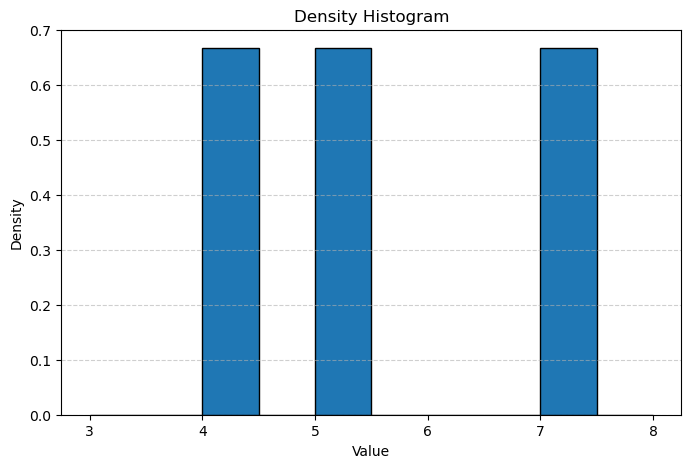

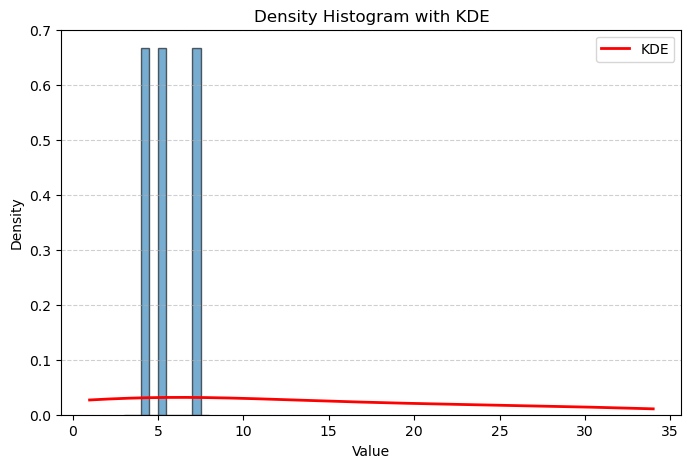

In [18]:
from scipy.stats import gaussian_kde
# Replace with your data if not already defined
# data = [...]

plt.figure(figsize=(8, 5))

# Create histogram with density=True
plt.hist(data, bins=bin_edges, edgecolor='black', density=True)
#change bins = 'auto' to value
# Add labels and title
plt.title('Density Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(8, 5))

# Create histogram with density=True
plt.hist(data, bins=bin_edges, edgecolor='black', density=True, alpha=0.6)

# Compute and plot KDE
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 200)
plt.plot(x_vals, kde(x_vals), color='red', linewidth=2, label='KDE')

# Add labels, title, and grid
plt.title('Density Histogram with KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

plt.show()

# Cleanup
del kde, x_vals


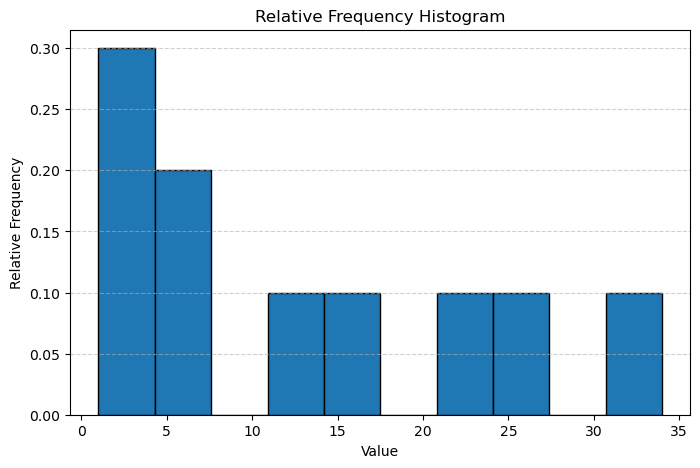

In [19]:
# IF WE ARE GIVEN THE TOTAL DATA SET WITH REPITION
n = len(data)

# Set weights so the total area sums to 1
weights = np.ones_like(data) / n

# Create histogram with relative frequencies
plt.figure(figsize=(8, 5))
plt.hist(data, bins=10, edgecolor='black', weights=weights)

# Labels and title
plt.title('Relative Frequency Histogram')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


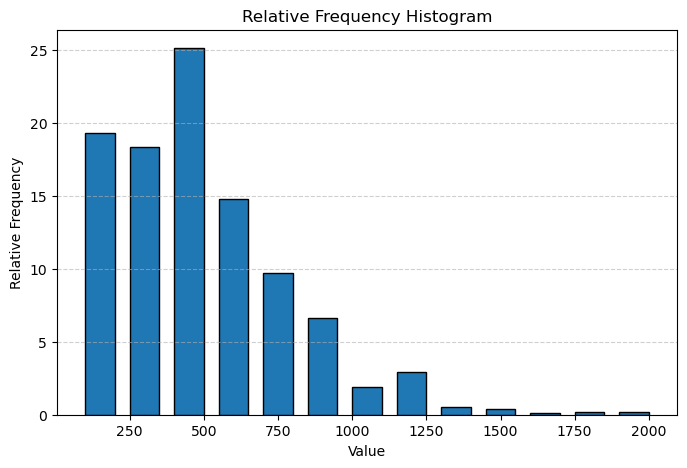

In [20]:
#IF USING FREQUENCIES AND VALUES
# Bar chart for relative frequency histogram
plt.figure(figsize=(8, 5))
plt.bar(values, relative_frequencies, width=100, edgecolor='black')  # Adjust width as needed
plt.title("Relative Frequency Histogram")
plt.xlabel("Value")
plt.ylabel("Relative Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

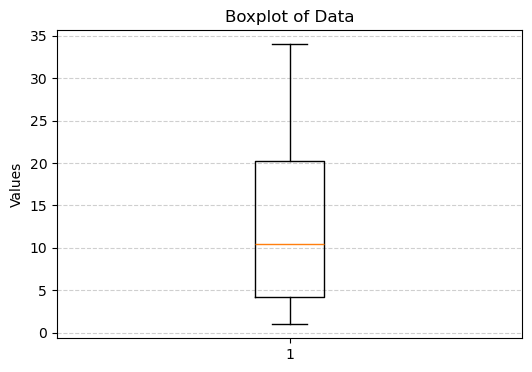

In [49]:
plt.figure(figsize=(6, 4))
plt.boxplot(data)  # Replace with your dataset name
plt.title("Boxplot of Data")
plt.ylabel("Values")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()